# Python Scientific & Analytical Libraries
## How do libraries work togther?

# Report: What tip percentage should we recommend?
## Analysis of Recent Restraunt Customers

In [18]:
sns.load_dataset('tips').to_csv('datasets/tips.csv', index=False)

---

In [20]:
tips = pd.read_csv('datasets/tips.csv')

In [23]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [21]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size
14,14.83,3.02,Female,No,Sun,Dinner,2
188,18.15,3.50,Female,Yes,Sun,Dinner,3
233,10.77,1.47,Male,No,Sat,Dinner,2


In [22]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [24]:
tips.describe(include=['object'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [25]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


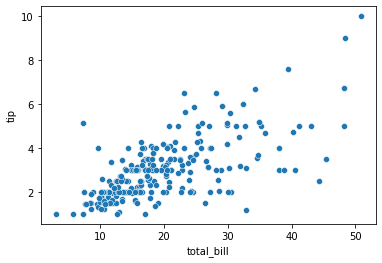

In [26]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])

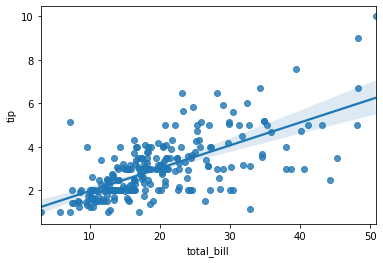

In [27]:
sns.regplot(x=tips['total_bill'], y=tips['tip'])

In [31]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


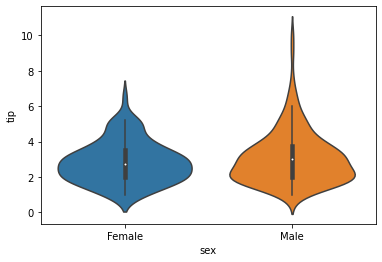

In [32]:
sns.violinplot(x=tips['sex'], y=tips['tip'])

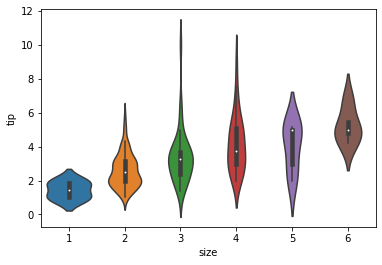

In [33]:
sns.violinplot(x=tips['size'], y=tips['tip'])

In [36]:
tips['ratio'] = tips['tip'] / tips['size']

In [37]:
tips.sample(3)

,total_bill,tip,sex,smoker,day,time,size,ratio
190,15.69,1.50,Male,Yes,Sun,Dinner,2,0.750
222,8.58,1.92,Male,Yes,Fri,Lunch,1,1.920
88,24.71,5.85,Male,No,Thur,Lunch,2,2.925


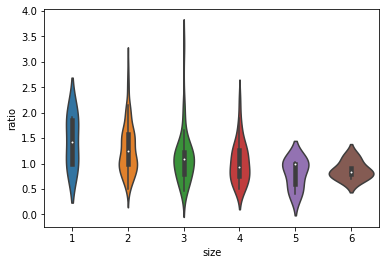

In [38]:
sns.violinplot(x=tips['size'], y=tips['ratio'])

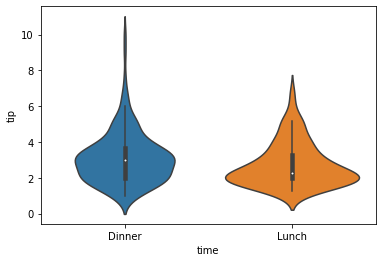

In [42]:
sns.violinplot(x=tips['time'], y=tips['tip'])

In [53]:
dinnertime = tips.loc[ 
    
    (tips['time'] != 'Dinner') & ( tips['size'] <= 2)
    
    , 
    
    ['total_bill', 'tip'] 

]

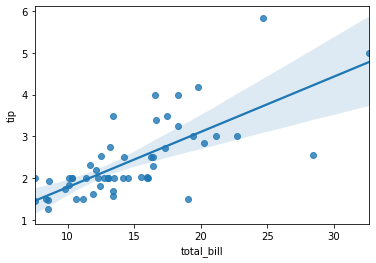

In [54]:
sns.regplot(x=dinnertime['total_bill'], y=dinnertime['tip'])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
X = tips[['total_bill', 'size']]
y = tips['tip']

model = LinearRegression().fit(X, y)

In [66]:
model.predict([
    [100, 5],
    [50, 3]
])

array([10.9032674 ,  5.88240497])

In [68]:
import numpy as np

In [77]:
np.arange(2, 100, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [84]:
np.arange(1, 12, 0.225).shape

(49,)

In [86]:
X_test = np.column_stack([
    np.arange(2, 100, 2),
    np.arange(1, 12, 0.225)
])

In [88]:
y_tip = model.predict(X_test)

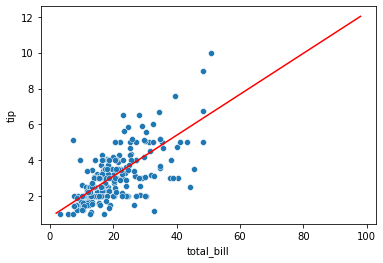

In [95]:
sns.lineplot(x=X_test[:, 0], y=y_tip, color="red");
sns.scatterplot(x=tips['total_bill'], y=tips['tip'])

In [96]:
model.predict([
    [100, 7]
])

array([11.28846298])

## Exercise (20min - 90m)

* Continue to expand this report:
    * add in subsets of the data & visuals
    * a few sentences to explain results
* Consider the `.predict`
    * by varying the inputs `[100, 7]`
        * what insight do you gain about the underlying dataset?
        * caveat: is this good insight? ie., are the predictions *accurate* ?

## Exercise (25min+)

* Search and download at least two kaggle notebooks which are of interest to you
    * 1. should be from the beginner set: https://www.kaggle.com/search?q=beginner
    * 2. should be a beginner notebook, but on any topic you're interested in....
        * eg., https://www.kaggle.com/kralmachine/football-results-from-1872-to-2018-datavisulation

* EXTRA:
    * **run** these notebooks locally on your machine and "play around"
    * to do this you may need to additionally download the dataset which accompanies them
        * this should be in the datasets tab